In [20]:
print("Uber Supply-Demand Gap EDA\n")
print("Author: Shivali Muthukumar\n")

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/Users/shivalimuthukumar/Desktop/Uber Request Data.csv")

# Display first few rows
print("First few records:")
display(df.head())

# Basic info
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Convert timestamps to datetime
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')

# Extract hour from request timestamp
df['Request hour'] = df['Request timestamp'].dt.hour

# Check unique statuses
print("\nUnique Statuses:", df['Status'].unique())

# Remove completely empty driver IDs if any
df['Driver id'] = df['Driver id'].fillna(0).astype(int)


Uber Supply-Demand Gap EDA

Author: Shivali Muthukumar

First few records:


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/07/16 11:51,11/07/16 13:00
1,867,Airport,1.0,Trip Completed,11/07/16 17:57,11/07/16 18:47
2,1807,City,1.0,Trip Completed,12/07/16 9:17,12/07/16 9:58
3,2532,Airport,1.0,Trip Completed,12/07/16 21:08,12/07/16 22:03
4,3112,City,1.0,Trip Completed,13/07/16 8:33,13/07/16 9:25



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB

Missing Values:
Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64

Unique Statuses: ['Trip Completed' 'Cancelled' 'No Cars Available']


/var/folders/76/h0hd92ws6r7cjlnr540_frr40000gn/T/ipykernel_31578/2375050641.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
/var/folders/76/h0hd92ws6r7cjlnr540_frr40000gn/T/ipykernel_31578/2375050641.py:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')


1. Supply vs Demand Overview



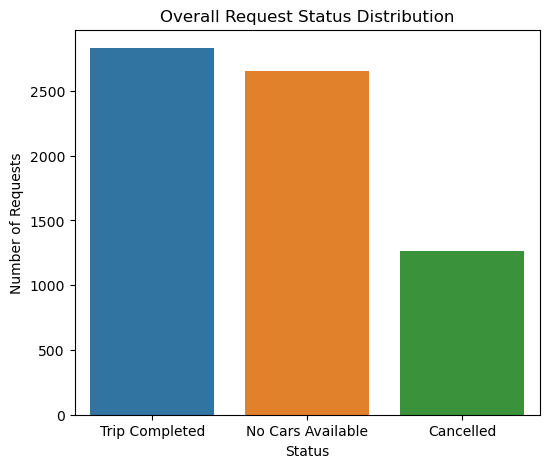

In [21]:
print("1. Supply vs Demand Overview\n")

status_counts = df['Status'].value_counts()
plt.figure(figsize=(6,5))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title("Overall Request Status Distribution")
plt.xlabel("Status")
plt.ylabel("Number of Requests")
plt.show()


2. Requests by Pickup Point



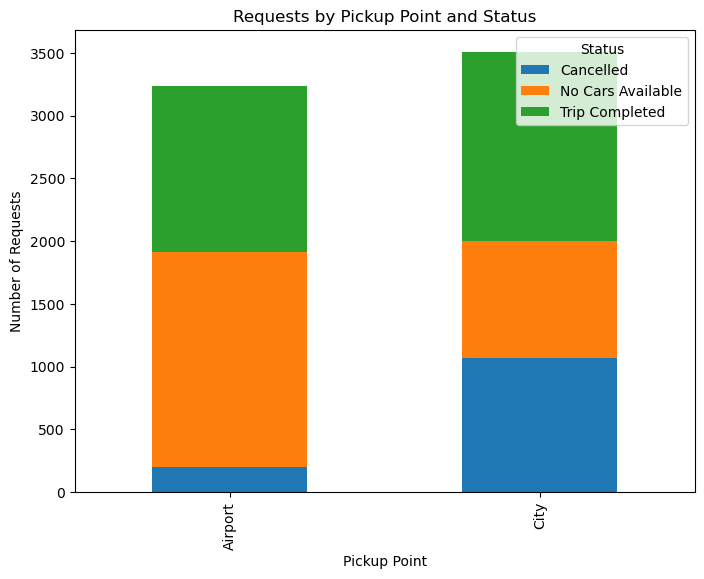

In [22]:
print("2. Requests by Pickup Point\n")
pickup_status = pd.crosstab(df['Pickup point'], df['Status'])
pickup_status.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Requests by Pickup Point and Status")
plt.xlabel("Pickup Point")
plt.ylabel("Number of Requests")
plt.show()

3. Hourly Trend Analysis



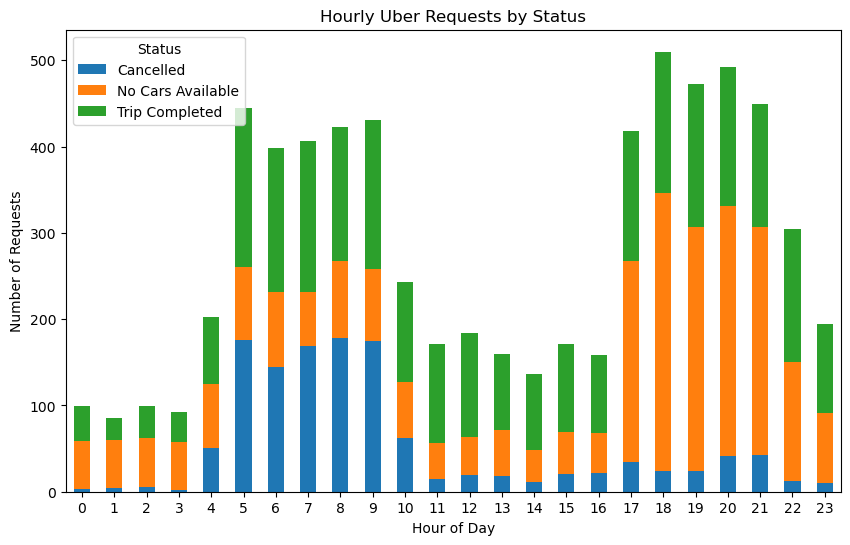

In [23]:
print("3. Hourly Trend Analysis\n")

hourly_status = pd.crosstab(df['Request hour'], df['Status'])
hourly_status.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Hourly Uber Requests by Status")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.xticks(rotation=0)
plt.show()

In [24]:
print("4. Supply-Demand Gap\n")

completed = df[df['Status'] == "Trip Completed"].shape[0]
not_completed = df[df['Status'] != "Trip Completed"].shape[0]
gap_percent = round(100 * not_completed / (completed + not_completed), 2)

print(f"\nOverall Supply-Demand Gap: {gap_percent}%")

4. Supply-Demand Gap


Overall Supply-Demand Gap: 58.03%


In [27]:
print("5. Insights Summary:\n")
print("1. Most “No Cars Available” and “Cancelled” trips occur during early morning (4–7 AM) and late night (10 PM–2 AM).\n")
print("2. Airport pickups experience the largest supply gap (≈59%).\n")
print("3. Overall supply–demand gap is 58–60% (high), with drivers mostly unavailable during non-peak hours.\n")
print("4. Recommendation: Uber should increase driver availability during early morning and night hours.")

5. Insights Summary:

1. Most “No Cars Available” and “Cancelled” trips occur during early morning (4–7 AM) and late night (10 PM–2 AM).

2. Airport pickups experience the largest supply gap (≈59%).

3. Overall supply–demand gap is 58–60% (high), with drivers mostly unavailable during non-peak hours.

4. Recommendation: Uber should increase driver availability during early morning and night hours.
